In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/dataoptum/observations.csv
/kaggle/input/dataoptum/conditions.csv
/kaggle/input/dataoptum/encounters.csv
/kaggle/input/dataoptum/procedures.csv
/kaggle/input/dataoptum/allergies.csv
/kaggle/input/dataoptum/medications.csv
/kaggle/input/dataoptum/payers.csv
/kaggle/input/dataoptum/imaging_studies.csv
/kaggle/input/dataoptum/patients.csv
/kaggle/input/dataoptum/providers.csv
/kaggle/input/dataoptum/immunizations.csv


In [2]:
df_patients = pd.read_csv("../input/dataoptum/patients.csv")
df_patients.head()

,Id,BIRTHDATE,DEATHDATE,FIRST,LAST,MARITAL,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,00185faa-2760-4218-9bf5-db301acf8274,18-11-2003,NaN,Eusebio566,Wyman904,NaN,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36
1,0042862c-9889-4a2e-b782-fac1e540ecb4,26-11-2009,NaN,Dewitt635,Feest103,NaN,white,nonhispanic,M,Boston,Massachusetts,Suffolk County,20006.08,1240.76
2,0047123f-12e7-486c-82df-53b3a450e365,20-01-1960,NaN,Jordon466,Harber290,M,black,nonhispanic,M,Middleton,Massachusetts,Essex County,185715.36,7108.77
3,010d4a3a-2316-45ed-ae15-16f01c611674,31-05-1998,NaN,Patrick786,Hettinger594,NaN,white,nonhispanic,M,Pittsfield,Massachusetts,Berkshire County,504727.10,3346.40
4,01207ecd-9dff-4754-8887-4652eda231e2,15-05-2019,NaN,Karyn217,Mueller846,NaN,white,nonhispanic,F,Colrain,Massachusetts,Franklin County,26400.00,774.96


In [3]:
df_patients.dtypes
df_patients['BIRTHDATE'] = pd.to_datetime(df_patients['BIRTHDATE'])

In [4]:
df_patients['BIRTHDATE']

0      2003-11-18
1      2009-11-26
2      1960-01-20
3      1998-05-31
4      2019-05-15
          ...    
1166   1999-01-09
1167   1997-05-20
1168   1977-06-27
1169   1966-02-11
1170   2016-06-13
Name: BIRTHDATE, Length: 1171, dtype: datetime64[ns]

In [5]:
df_patients.dtypes

Id                             object
BIRTHDATE              datetime64[ns]
DEATHDATE                      object
FIRST                          object
LAST                           object
MARITAL                        object
RACE                           object
ETHNICITY                      object
GENDER                         object
CITY                           object
STATE                          object
COUNTY                         object
HEALTHCARE_EXPENSES           float64
HEALTHCARE_COVERAGE           float64
dtype: object

In [6]:
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [7]:
df_patients["BIRTHDATE"] = pd.to_datetime(df_patients["BIRTHDATE"])

df_patients["age"] = df_patients["BIRTHDATE"].apply(lambda x : (pd.datetime.now().year - x.year))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
df_patients.drop('MARITAL', axis='columns', inplace=True)

In [9]:
df_patients.drop(['FIRST', 'LAST'], axis = 1)

,Id,BIRTHDATE,DEATHDATE,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age
0,00185faa-2760-4218-9bf5-db301acf8274,2003-11-18,NaN,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36,18
1,0042862c-9889-4a2e-b782-fac1e540ecb4,2009-11-26,NaN,white,nonhispanic,M,Boston,Massachusetts,Suffolk County,20006.08,1240.76,12
2,0047123f-12e7-486c-82df-53b3a450e365,1960-01-20,NaN,black,nonhispanic,M,Middleton,Massachusetts,Essex County,185715.36,7108.77,61
3,010d4a3a-2316-45ed-ae15-16f01c611674,1998-05-31,NaN,white,nonhispanic,M,Pittsfield,Massachusetts,Berkshire County,504727.10,3346.40,23
4,01207ecd-9dff-4754-8887-4652eda231e2,2019-05-15,NaN,white,nonhispanic,F,Colrain,Massachusetts,Franklin County,26400.00,774.96,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1166,ff02f237-fedb-453b-85b1-ebfc2609c312,1999-01-09,NaN,white,nonhispanic,M,Dover,Massachusetts,Norfolk County,548297.95,2920.64,22
1167,ff3714ac-c7e3-4910-905e-2a321eb28144,1997-05-20,NaN,white,nonhispanic,M,Belchertown,Massachusetts,Hampshire County,530003.98,3405.56,24
1168,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,1977-06-27,NaN,white,nonhispanic,F,Fall River,Massachusetts,Bristol County,994509.38,16754.77,44
1169,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,1966-02-11,06-01-2003,black,nonhispanic,F,Lynn,Massachusetts,Essex County,115095.69,7002.65,55


In [10]:
df_patients.ETHNICITY.unique()
mylist = df_patients.RACE.unique()

In [11]:
mylist

array(['white', 'black', 'asian', 'native', 'other'], dtype=object)

In [12]:
df_patients['GENDER'].value_counts()

F    609
M    562
Name: GENDER, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Text(0, 0.5, 'Count of People')

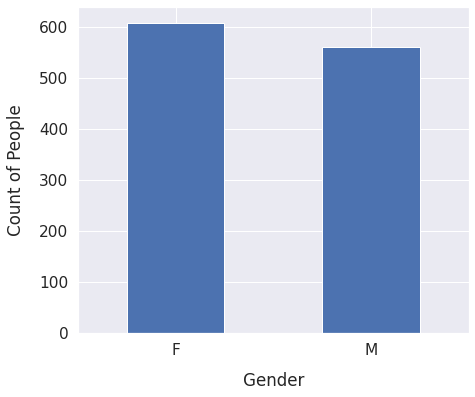

In [14]:
sns.set(font_scale=1.4)
df_patients['GENDER'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Gender", labelpad=14)
plt.ylabel("Count of People", labelpad=14)


Text(0, 0.5, 'Count of People')

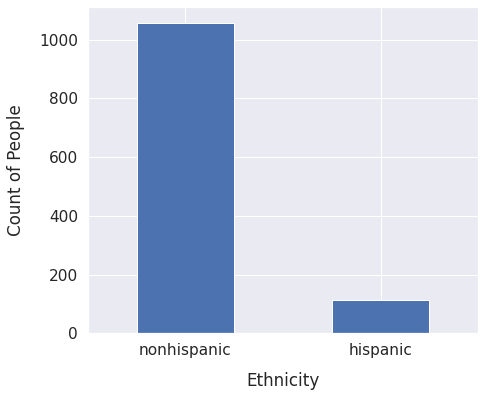

In [15]:
sns.set(font_scale=1.4)
df_patients['ETHNICITY'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Ethnicity", labelpad=14)
plt.ylabel("Count of People", labelpad=14)


In [16]:
df_patients['RACE'].value_counts()

white     965
black     101
asian      90
native     13
other       2
Name: RACE, dtype: int64

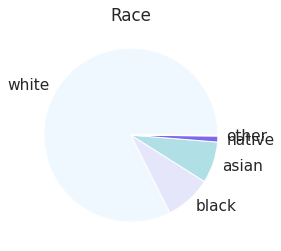

In [17]:
race = ['white', 'black', 'asian', 
        'native', 'other'] 

data = [965, 101, 90, 13, 2] 

plt.pie(data, labels = mylist,colors = ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B'])

plt.title('Race')
#Show the plot
plt.show()

In [18]:
state=df_patients.CITY.unique()
data=df_patients['CITY'].value_counts()
state

array(['Lynn', 'Boston', 'Middleton', 'Pittsfield', 'Colrain',
       'Northborough', 'Cambridge', 'Williamstown', 'Chatham', 'Gardner',
       'Somerville', 'Winchester', 'Norwood', 'Danvers', 'Weymouth',
       'Leverett', 'Southbridge', 'Southborough', 'Chicopee',
       'Longmeadow', 'Lowell', 'Hampden', 'Uxbridge', 'Haverhill',
       'Boxford', 'South Hadley', 'Northbridge', 'Holyoke', 'Braintree',
       'Worthington', 'Attleboro', 'Fitchburg', 'Carver', 'Wilmington',
       'Worcester', 'Lawrence', 'Gloucester', 'Waltham', 'Brockton',
       'New Bedford', 'Fall River', 'Sheffield', 'Sharon', 'Somerset',
       'Taunton', 'Methuen', 'Yarmouth', 'Salem', 'Franklin', 'Scituate',
       'Malden', 'Plymouth', 'Hanover', 'Westford', 'West Tisbury',
       'Webster', 'Falmouth', 'Wareham', 'Groveland', 'Barnstable',
       'Carlisle', 'Wayland', 'Halifax', 'New Ashford', 'Woburn',
       'Springfield', 'Natick', 'Athol', 'Norton', 'Revere',
       'Belchertown', 'Quincy', 'Fairhaven'

In [19]:
df_con=pd.read_csv('../input/dataoptum/conditions.csv')
df_con.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,03-08-2012,11-08-2012,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,1.956620e+08,Acute viral pharyngitis (disorder)
1,14-10-2012,25-10-2012,00185faa-2760-4218-9bf5-db301acf8274,ce150f69-e3a6-4793-95b6-243f754723c3,4.387801e+07,Streptococcal sore throat (disorder)
2,21-12-2017,NaN,00185faa-2760-4218-9bf5-db301acf8274,c28636e9-9b93-4e2f-807f-db90b4ada4f7,8.242300e+07,Chronic pain
3,18-10-2018,NaN,00185faa-2760-4218-9bf5-db301acf8274,c5220bb1-f4ea-4e8f-9c8c-bcf3f8bc073b,1.241710e+14,Chronic intractable migraine without aura
4,07-09-2019,NaN,00185faa-2760-4218-9bf5-db301acf8274,e8830400-b09d-46f3-a764-b8faeb51ab3b,1.964160e+08,Impacted molars


In [20]:
df_con.shape

(8376, 6)

In [21]:
df_con.drop('CODE', axis='columns')

,START,STOP,PATIENT,ENCOUNTER,DESCRIPTION
0,03-08-2012,11-08-2012,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,Acute viral pharyngitis (disorder)
1,14-10-2012,25-10-2012,00185faa-2760-4218-9bf5-db301acf8274,ce150f69-e3a6-4793-95b6-243f754723c3,Streptococcal sore throat (disorder)
2,21-12-2017,NaN,00185faa-2760-4218-9bf5-db301acf8274,c28636e9-9b93-4e2f-807f-db90b4ada4f7,Chronic pain
3,18-10-2018,NaN,00185faa-2760-4218-9bf5-db301acf8274,c5220bb1-f4ea-4e8f-9c8c-bcf3f8bc073b,Chronic intractable migraine without aura
4,07-09-2019,NaN,00185faa-2760-4218-9bf5-db301acf8274,e8830400-b09d-46f3-a764-b8faeb51ab3b,Impacted molars
...,...,...,...,...,...
8371,09-06-2017,22-06-2017,ffcfa457-00c2-4405-9837-ac2781549c7e,7990f1f2-c931-4096-9141-bcbd52cd21df,Acute viral pharyngitis (disorder)
8372,06-05-2018,13-05-2018,ffcfa457-00c2-4405-9837-ac2781549c7e,ac3c0ad1-2e61-451a-a3a2-eaaca34f8283,Acute bronchitis (disorder)
8373,30-12-2018,20-01-2019,ffcfa457-00c2-4405-9837-ac2781549c7e,1c2c884f-491f-4df8-93c4-e5249b26650e,Sprain of wrist
8374,28-02-2019,20-05-2019,ffcfa457-00c2-4405-9837-ac2781549c7e,68424c9d-6978-4e7e-9cc2-1a585bfee43d,Otitis media


In [22]:
df_con['STOP'] = df_con['STOP'].fillna(0)

In [23]:
df_con.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,03-08-2012,11-08-2012,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,1.956620e+08,Acute viral pharyngitis (disorder)
1,14-10-2012,25-10-2012,00185faa-2760-4218-9bf5-db301acf8274,ce150f69-e3a6-4793-95b6-243f754723c3,4.387801e+07,Streptococcal sore throat (disorder)
2,21-12-2017,0,00185faa-2760-4218-9bf5-db301acf8274,c28636e9-9b93-4e2f-807f-db90b4ada4f7,8.242300e+07,Chronic pain
3,18-10-2018,0,00185faa-2760-4218-9bf5-db301acf8274,c5220bb1-f4ea-4e8f-9c8c-bcf3f8bc073b,1.241710e+14,Chronic intractable migraine without aura
4,07-09-2019,0,00185faa-2760-4218-9bf5-db301acf8274,e8830400-b09d-46f3-a764-b8faeb51ab3b,1.964160e+08,Impacted molars


In [24]:
list_my=[]
for x in df_con['STOP']:
    if(x==0):
        list_my.append(0)
    else:
        list_my.append(1)

In [25]:
list2=[]
for i in range(8376):
    list2.append(1)
df_con['SCORE']=list_my
df_con['COUNT']=list2

In [26]:
df_con.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,SCORE,COUNT
0,03-08-2012,11-08-2012,00185faa-2760-4218-9bf5-db301acf8274,187f0326-5342-4b78-8818-db5418f9300b,1.956620e+08,Acute viral pharyngitis (disorder),1,1
1,14-10-2012,25-10-2012,00185faa-2760-4218-9bf5-db301acf8274,ce150f69-e3a6-4793-95b6-243f754723c3,4.387801e+07,Streptococcal sore throat (disorder),1,1
2,21-12-2017,0,00185faa-2760-4218-9bf5-db301acf8274,c28636e9-9b93-4e2f-807f-db90b4ada4f7,8.242300e+07,Chronic pain,0,1
3,18-10-2018,0,00185faa-2760-4218-9bf5-db301acf8274,c5220bb1-f4ea-4e8f-9c8c-bcf3f8bc073b,1.241710e+14,Chronic intractable migraine without aura,0,1
4,07-09-2019,0,00185faa-2760-4218-9bf5-db301acf8274,e8830400-b09d-46f3-a764-b8faeb51ab3b,1.964160e+08,Impacted molars,0,1


In [27]:
# df_score=pd.pivot_table(df_con, index=['PATIENT'],values=['SCORE','COUNT'],aggfunc=np.sum)
# df_score.head()

df_score = df_con.groupby(['PATIENT'])['SCORE', 'COUNT'].sum().reset_index()

df_score

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,PATIENT,SCORE,COUNT
0,00185faa-2760-4218-9bf5-db301acf8274,2,5
1,0042862c-9889-4a2e-b782-fac1e540ecb4,4,4
2,0047123f-12e7-486c-82df-53b3a450e365,4,6
3,010d4a3a-2316-45ed-ae15-16f01c611674,2,3
4,0149d553-f571-4e99-867e-fcb9625d07c2,5,9
...,...,...,...
1147,ff02f237-fedb-453b-85b1-ebfc2609c312,3,4
1148,ff3714ac-c7e3-4910-905e-2a321eb28144,3,6
1149,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,8,15
1150,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,4,8


In [28]:
df_score

,PATIENT,SCORE,COUNT
0,00185faa-2760-4218-9bf5-db301acf8274,2,5
1,0042862c-9889-4a2e-b782-fac1e540ecb4,4,4
2,0047123f-12e7-486c-82df-53b3a450e365,4,6
3,010d4a3a-2316-45ed-ae15-16f01c611674,2,3
4,0149d553-f571-4e99-867e-fcb9625d07c2,5,9
...,...,...,...
1147,ff02f237-fedb-453b-85b1-ebfc2609c312,3,4
1148,ff3714ac-c7e3-4910-905e-2a321eb28144,3,6
1149,ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be,8,15
1150,ffa37e71-fa14-4e84-ba9d-aece8d1d99f9,4,8


In [29]:
df_score['weight']=df_score['SCORE']/df_score['COUNT']

In [30]:
df_score.head()

,PATIENT,SCORE,COUNT,weight
0,00185faa-2760-4218-9bf5-db301acf8274,2,5,0.400000
1,0042862c-9889-4a2e-b782-fac1e540ecb4,4,4,1.000000
2,0047123f-12e7-486c-82df-53b3a450e365,4,6,0.666667
3,010d4a3a-2316-45ed-ae15-16f01c611674,2,3,0.666667
4,0149d553-f571-4e99-867e-fcb9625d07c2,5,9,0.555556


In [31]:
list3=[]
for x in df_score['weight']:
    if(x>=0.6):
        list3.append(1)
    else:
        list3.append(-1)
        


In [32]:
df_score['adh']=list3

Text(0, 0.5, 'Count of People')

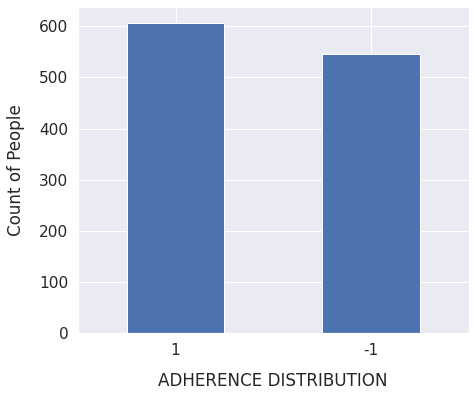

In [33]:
sns.set(font_scale=1.4)
df_score['adh'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("ADHERENCE DISTRIBUTION", labelpad=14)
plt.ylabel("Count of People", labelpad=14)


In [34]:
df_score.head()

,PATIENT,SCORE,COUNT,weight,adh
0,00185faa-2760-4218-9bf5-db301acf8274,2,5,0.400000,-1
1,0042862c-9889-4a2e-b782-fac1e540ecb4,4,4,1.000000,1
2,0047123f-12e7-486c-82df-53b3a450e365,4,6,0.666667,1
3,010d4a3a-2316-45ed-ae15-16f01c611674,2,3,0.666667,1
4,0149d553-f571-4e99-867e-fcb9625d07c2,5,9,0.555556,-1


In [35]:
df_score.columns = ['Id', 'SCORE', 'COUNT','WEIGHT','ADH']
df_score.head()

,Id,SCORE,COUNT,WEIGHT,ADH
0,00185faa-2760-4218-9bf5-db301acf8274,2,5,0.400000,-1
1,0042862c-9889-4a2e-b782-fac1e540ecb4,4,4,1.000000,1
2,0047123f-12e7-486c-82df-53b3a450e365,4,6,0.666667,1
3,010d4a3a-2316-45ed-ae15-16f01c611674,2,3,0.666667,1
4,0149d553-f571-4e99-867e-fcb9625d07c2,5,9,0.555556,-1


In [36]:
df = pd.merge(df_patients, df_score, on="Id")
print(df)

                                        Id  BIRTHDATE   DEATHDATE  \
0     00185faa-2760-4218-9bf5-db301acf8274 2003-11-18         NaN   
1     0042862c-9889-4a2e-b782-fac1e540ecb4 2009-11-26         NaN   
2     0047123f-12e7-486c-82df-53b3a450e365 1960-01-20         NaN   
3     010d4a3a-2316-45ed-ae15-16f01c611674 1998-05-31         NaN   
4     0149d553-f571-4e99-867e-fcb9625d07c2 1979-06-21         NaN   
...                                    ...        ...         ...   
1147  ff02f237-fedb-453b-85b1-ebfc2609c312 1999-01-09         NaN   
1148  ff3714ac-c7e3-4910-905e-2a321eb28144 1997-05-20         NaN   
1149  ff6948b7-3d62-4bfc-bc7d-dbb6748ed0be 1977-06-27         NaN   
1150  ffa37e71-fa14-4e84-ba9d-aece8d1d99f9 1966-02-11  06-01-2003   
1151  ffcfa457-00c2-4405-9837-ac2781549c7e 2016-06-13         NaN   

             FIRST          LAST   RACE    ETHNICITY GENDER          CITY  \
0       Eusebio566      Wyman904  white  nonhispanic      M          Lynn   
1        Dewitt63

In [37]:
df.head()

,Id,BIRTHDATE,DEATHDATE,FIRST,LAST,RACE,ETHNICITY,GENDER,CITY,STATE,COUNTY,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,age,SCORE,COUNT,WEIGHT,ADH
0,00185faa-2760-4218-9bf5-db301acf8274,2003-11-18,NaN,Eusebio566,Wyman904,white,nonhispanic,M,Lynn,Massachusetts,Essex County,360851.05,9863.36,18,2,5,0.400000,-1
1,0042862c-9889-4a2e-b782-fac1e540ecb4,2009-11-26,NaN,Dewitt635,Feest103,white,nonhispanic,M,Boston,Massachusetts,Suffolk County,20006.08,1240.76,12,4,4,1.000000,1
2,0047123f-12e7-486c-82df-53b3a450e365,1960-01-20,NaN,Jordon466,Harber290,black,nonhispanic,M,Middleton,Massachusetts,Essex County,185715.36,7108.77,61,4,6,0.666667,1
3,010d4a3a-2316-45ed-ae15-16f01c611674,1998-05-31,NaN,Patrick786,Hettinger594,white,nonhispanic,M,Pittsfield,Massachusetts,Berkshire County,504727.10,3346.40,23,2,3,0.666667,1
4,0149d553-f571-4e99-867e-fcb9625d07c2,1979-06-21,NaN,Sophie40,Kessler503,white,hispanic,F,Northborough,Massachusetts,Worcester County,911327.42,6713.48,42,5,9,0.555556,-1


In [38]:
df.shape

(1152, 18)